In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
import os

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
pd.options.mode.chained_assignment = None  # default='warn'
sns.set_style("white")

import sys
# This allows us to import the nucml utilities
sys.path.append("..")

import nucml.exfor.data_utilities as exfor_utils
import nucml.endf.data_utilities as endf_utils
import nucml.plot.plotting_utilities as plot_utils
import nucml.datasets as nuc_data
import nucml.ace.data_utilities as ace_utils
import nucml.model.model_building as model_building
import nucml.model.model_utilities as model_utils
import nucml.general_utilities as gen_utils
import nucml.ace.plotting_utilities as ace_plots

In [12]:
importlib.reload(exfor_utils)
importlib.reload(gen_utils)
importlib.reload(endf_utils)
importlib.reload(plot_utils)
importlib.reload(nuc_data)
importlib.reload(ace_utils)
importlib.reload(model_building)
importlib.reload(model_utils)
importlib.reload(ace_plots)
print("Finish re-loading scripts.")

Finish re-loading scripts.


In [11]:
figure_dir = "figures/B2/"

In [4]:
sns.set(font_scale=2.5)
sns.set_style('white')

# Gathering Results from Benchmark Calculations

In [5]:
dt_results = ace_utils.gather_benchmark_results("acedata_ml/U233/DT_B2/")

In [6]:
# knn_results = ace_utils.gather_benchmark_results("acedata_ml/U233/KNN_B0/")

# Analyzing Decision Tree Results

In [6]:
to_append_dt = pd.read_csv("../ML_EXFOR_neutrons/2_DT/DT_B2/dt_results.csv")
to_append_dt["Model"] = to_append_dt.model_path.apply(lambda x: os.path.basename(os.path.dirname(x)))
to_append_dt = to_append_dt[["Model", "train_mae", "val_mae", "test_mae", "normalizer", "max_depth", "mss", "msl"]]

In [7]:
dt_final = dt_results.merge(to_append_dt, on="Model")

In [8]:
dt_final.sort_values(by="Deviation_Ana").head()

,Model,K_eff_ana,Unc_ana,K_eff_imp,Unc_imp,Deviation_Ana,Deviation_Imp,train_mae,val_mae,test_mae,normalizer,max_depth,mss,msl
136,DT380_MSS2_MSL1_standard_one_hot_B2_v5,0.999837,0.00144,1.00087,0.00094,0.000163,0.00087,0.025824,0.134088,0.135197,standard,380,2,1.0
52,DT170_MSS2_MSL1_standard_one_hot_B2_v5,0.999793,0.00154,1.00182,0.00098,0.000207,0.00182,0.025958,0.133962,0.135106,standard,170,2,1.0
56,DT180_MSS2_MSL1_standard_one_hot_B2_v5,1.000290,0.00147,1.00211,0.00090,0.000290,0.00211,0.025946,0.134016,0.135070,standard,180,2,1.0
88,DT260_MSS2_MSL1_standard_one_hot_B2_v5,1.000290,0.00128,1.00016,0.00084,0.000290,0.00016,0.025882,0.134055,0.135118,standard,260,2,1.0
180,DT80_MSS5_MSL1_standard_one_hot_B2_v5,1.000360,0.00139,1.00186,0.00093,0.000360,0.00186,0.052437,0.129465,0.130246,standard,80,5,1.0


In [13]:
model_utils.get_best_models_df(dt_final)

,Model,K_eff_ana,Unc_ana,K_eff_imp,Unc_imp,Deviation_Ana,Deviation_Imp,train_mae,val_mae,test_mae,normalizer,max_depth,mss,msl,tag
144,DT400_MSS2_MSL1_standard_one_hot_B2_v5,1.002310,0.00141,1.003050,0.00089,0.002310,0.003050,0.025814,0.134126,0.135166,standard,400,2,1.0,Train
161,DT70_MSS10_MSL7_standard_one_hot_B2_v5,0.878782,0.00143,0.879436,0.00082,0.121218,0.120564,0.094574,0.118242,0.118858,standard,70,10,7.0,Val
3,DT100_MSS10_MSL7_standard_one_hot_B2_v5,0.879519,0.00139,0.879090,0.00104,0.120481,0.120910,0.094545,0.118255,0.118804,standard,100,10,7.0,Test


In [14]:
dt_final = dt_final[dt_final.K_eff_ana > 0.99]
# dt_final.K_eff_ana.min()

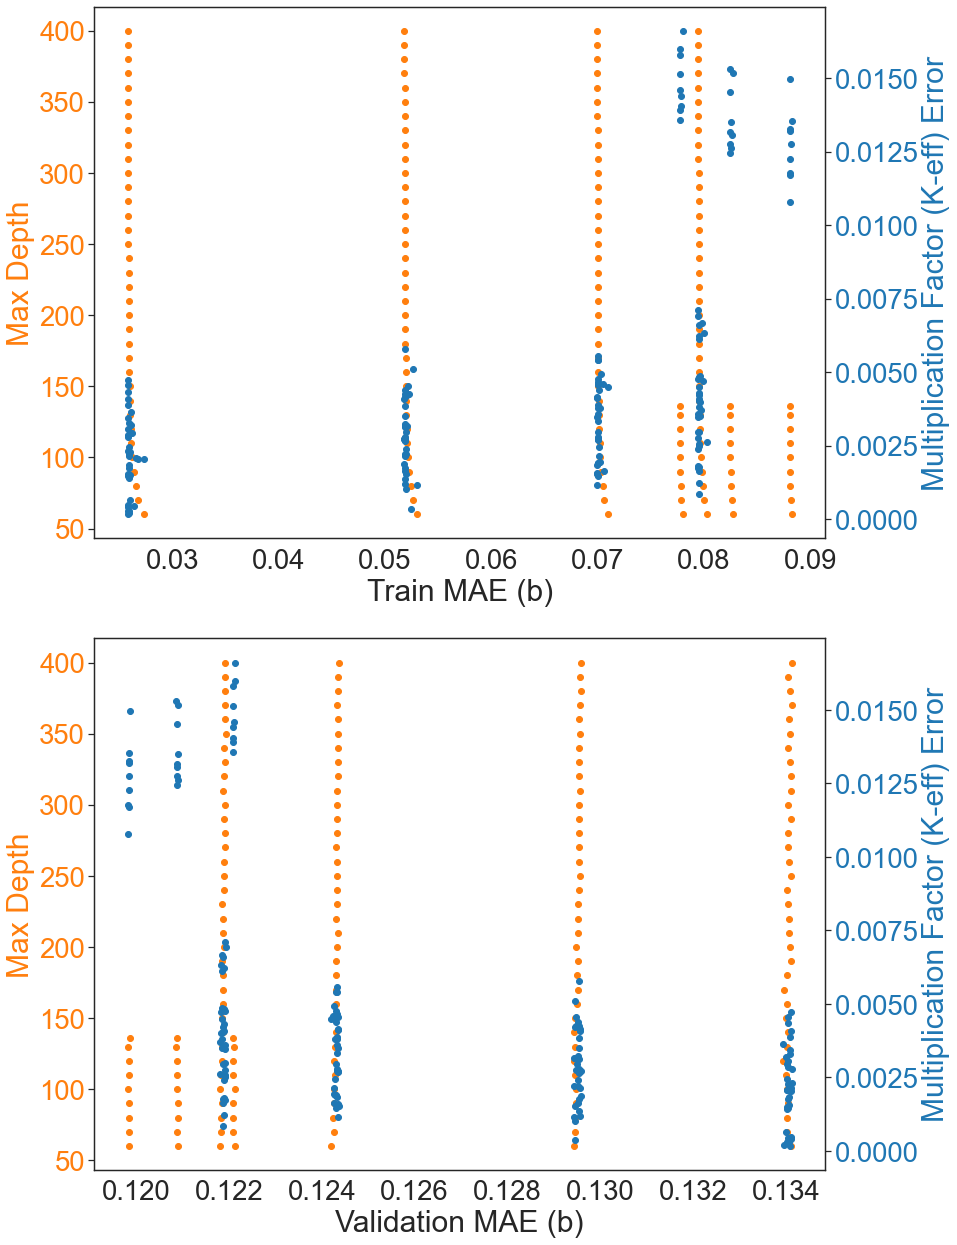

In [15]:
ace_plots.dt_dual_keff_plot(
    dt_final[dt_final.Deviation_Ana < 0.08], 
    "train_mae", "val_mae", "max_depth", "Deviation_Ana", save=True, saving_dir=figure_dir)

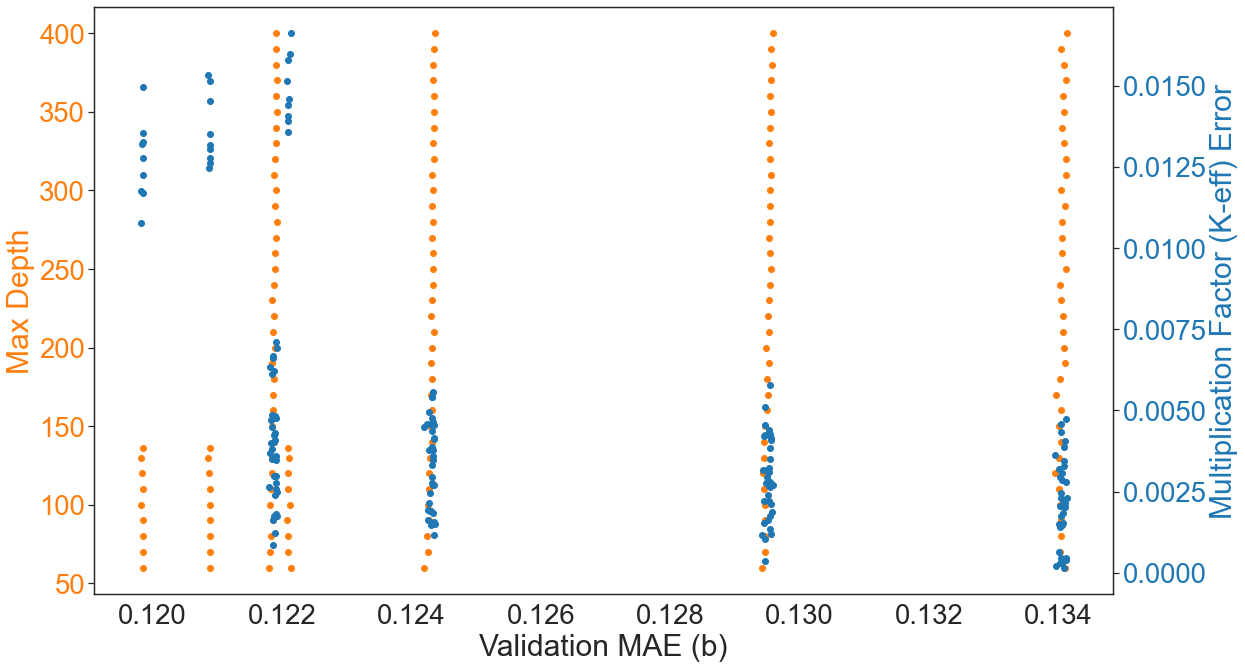

In [16]:
ace_plots.dt_keff_plot(
    dt_final[dt_final.Deviation_Ana < 0.08], 
    "val_mae", "max_depth", "Deviation_Ana", save=True, saving_dir=figure_dir)

# Analyzing KNN Results

In [ ]:
to_append_knn = pd.read_csv("../ML_EXFOR_neutrons/1_KNN/KNN_B2/knn_results.csv")
to_append_knn["Model"] = to_append_knn.model_path.apply(lambda x: os.path.basename(os.path.dirname(x)))
to_append_knn = to_append_knn[["Model", "id", "train_mae", "val_mae", "test_mae", "normalizer", "distance_metric"]]

In [ ]:
knn_final = knn_results.merge(to_append_knn, on="Model")

In [ ]:
knn_final["k"] = knn_final.Model.apply(lambda x: x.split("_")[0][1:]).astype(int)

In [ ]:
knn_final.sort_values(by="Deviation_Ana").head()

In [ ]:
knn_robust_euclidean = knn_final[(knn_final.distance_metric == "euclidean") & (knn_final.normalizer == "robust")].sort_values(by="k")

In [ ]:
model_utils.get_best_models_df(knn_robust_euclidean)

In [ ]:
ace_plots.knn_dual_plot(
    knn_robust_euclidean, "k", "train_mae", "val_mae", "Deviation_Ana", save=True, saving_dir=figure_dir)

In [ ]:
# ace_plot_utils.knn_dual_plot(
#     knn_robust_euclidean, "k", "train_mae", "val_mae", "K_eff_ana", save=False, saving_dir=figure_dir)

In [ ]:
ace_plots.knn_keff_plot(
    knn_robust_euclidean, "k", "val_mae", "Deviation_Ana", save=True, saving_dir=figure_dir)